## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
train_data = pd.read_csv('airline_dataset/train.csv')
test_data = pd.read_csv('airline_dataset/test.csv')


train = train_data.drop(['id'], axis=1)
y_train = train_data['target']
test = test_data.drop('id', axis = 1)

pd.set_option('display.max_columns', None) #컬럼 수가 많으므로 요약되어 표시 하지 않게


In [3]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1


In [4]:
train.isna().sum() # 결측치 없다.

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
target                               0
dtype: int64

## 기초 통계 분석

#### feature 분포들 시각화

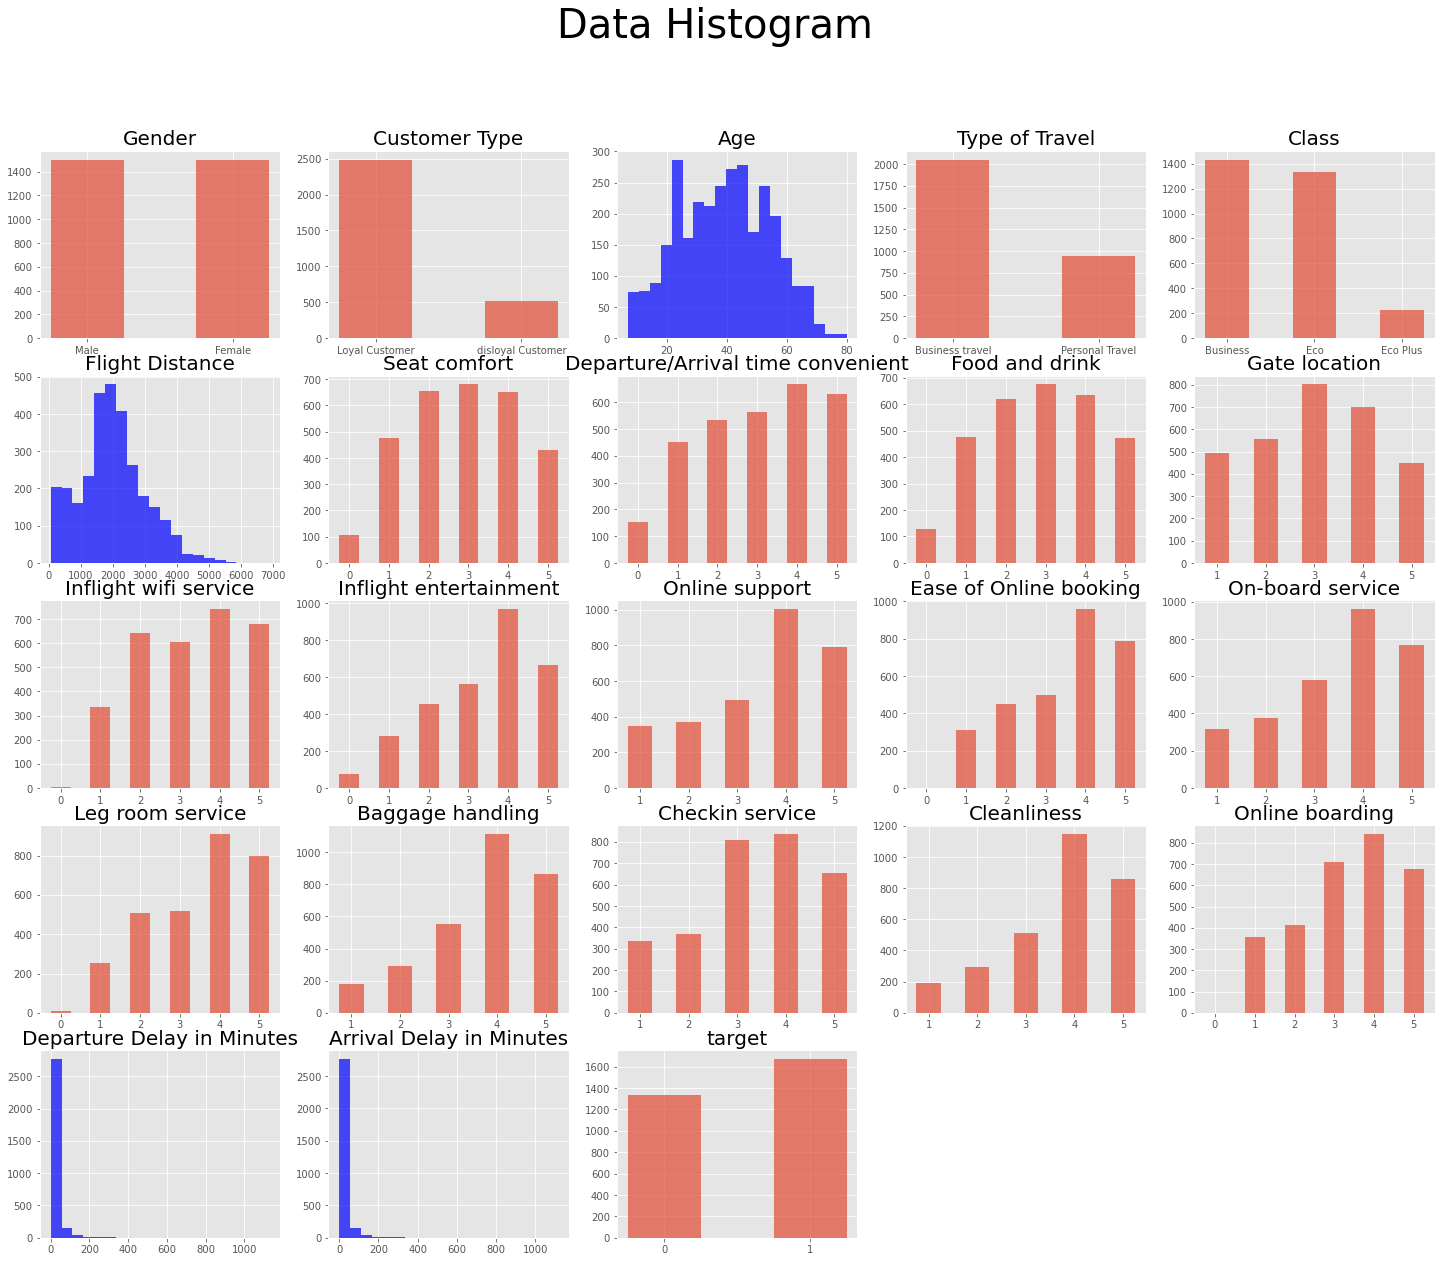

In [5]:
plt.style.use('ggplot')

# 히스토그램을 사용해 데이터의 분포 살펴보기
plt.figure(figsize=(25,20))
plt.suptitle('Data Histogram', fontsize = 40)

# id 제외하고 시각화
cols = train.columns
for i in range(len(cols)):
    plt.subplot(5, 5, i+1) # 5행 5열 최대 25개의 분포 확인 가능
    plt.title(cols[i], fontsize=20) # 각 분포그림의 제목을 특징명으로 설정
    if len(train[cols[i]].unique()) > 20:
        plt.hist(train[cols[i]], bins=20, color='b', alpha=0.7) #히스토 그램출력 bins는 칸을 나누는 값
    
    else: # unique() 값이 20개가 넘지않으면
        temp = train[cols[i]].value_counts() # 특징 값 종류의 개수를 temp에 저장
        plt.bar(temp.keys(), temp.values, width = 0.5, alpha=0.7)
        plt.xticks(temp.keys())
        

plt.show()
                
    

## target 과 feature들의 관계 확인

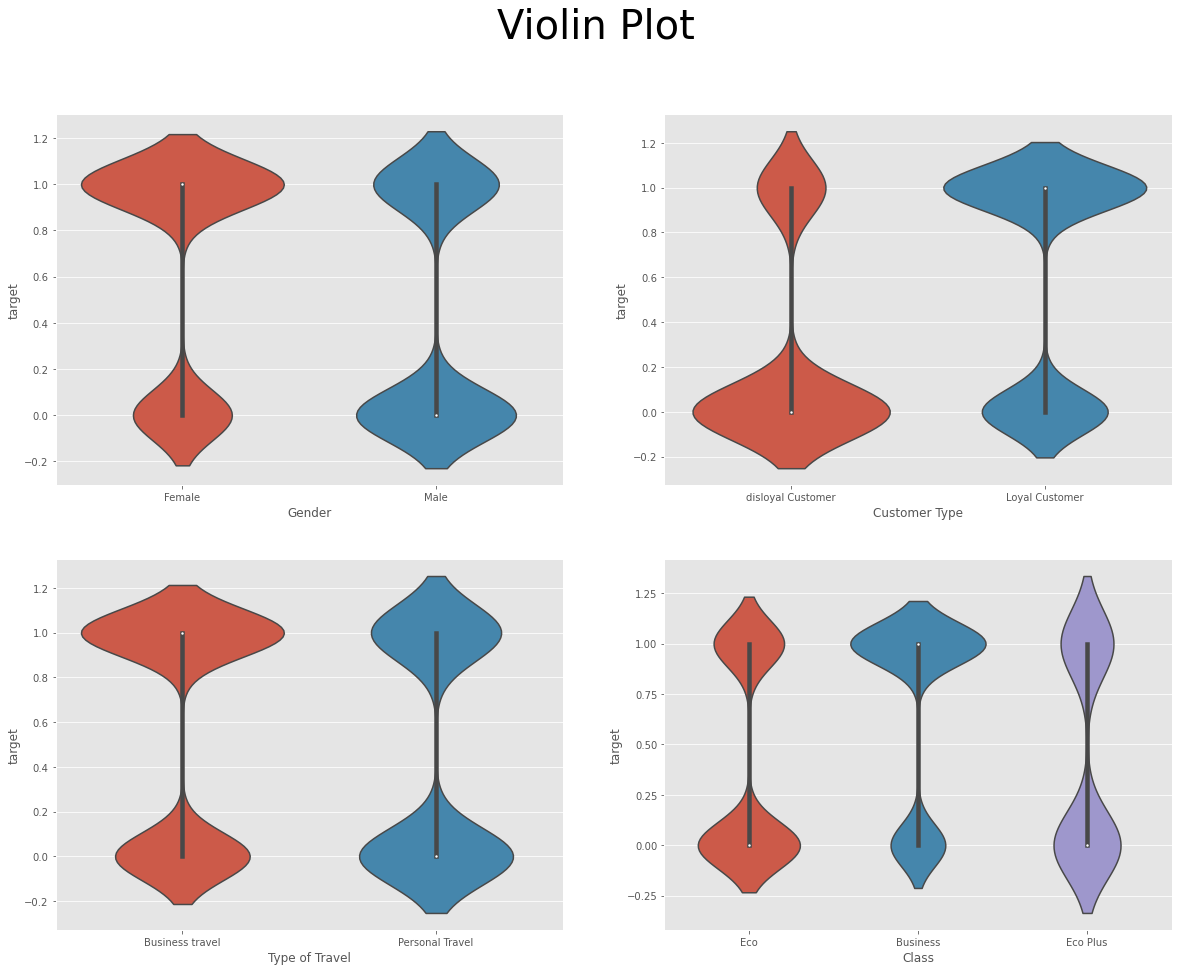

In [6]:
# 타겟 설정
target = 'target'
# 범주형 데이터 분리
categorical_feature = train.columns[train.dtypes == 'object']

plt.figure(figsize=(20,15))
plt.suptitle('Violin Plot', fontsize=40)

#id 제외하고 시각화
for i in range(len(categorical_feature)):
    plt.subplot(2,2,i+1)
    plt.xlabel(categorical_feature[i])
    plt.ylabel('target')
    sns.violinplot(x= train[categorical_feature[i]], y= train['target'])
plt.show()

customer type 의 경우 disloyal과 loyal에 따라 target 값 차이가 확실하다. 중요한 특징인 것 같다.

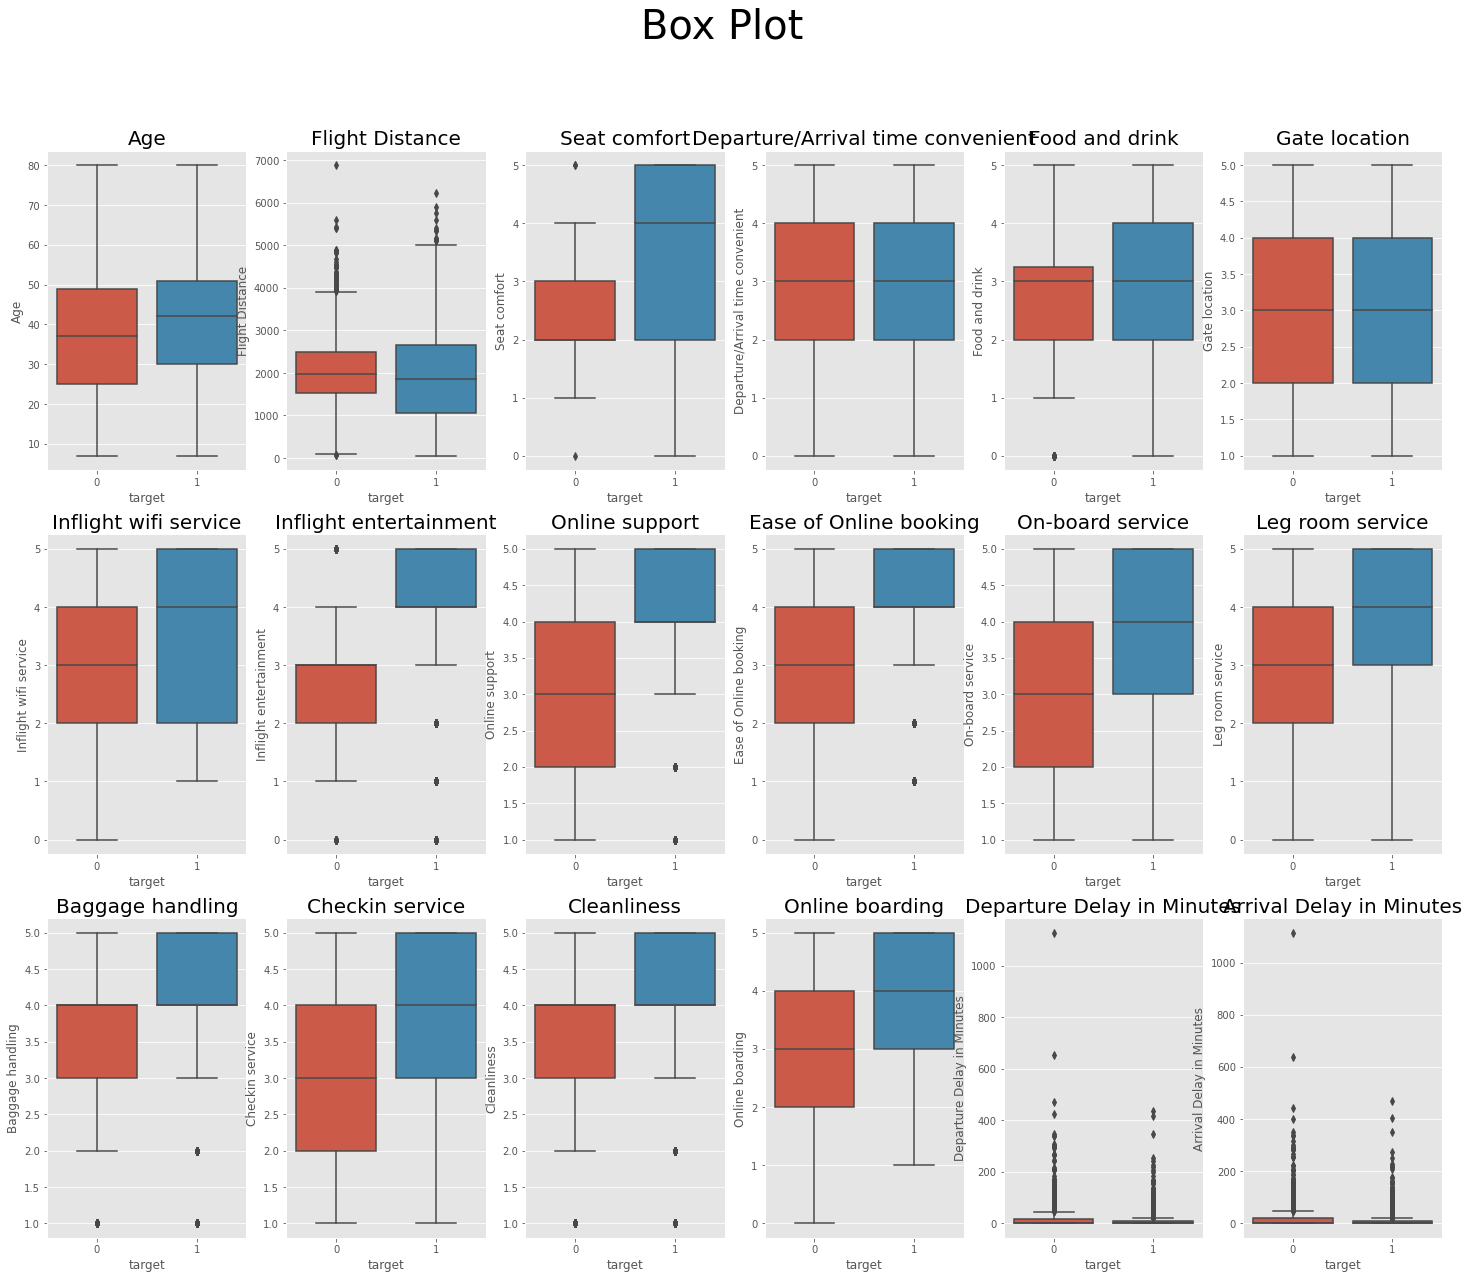

In [7]:
# 수치형 데이터 분리
numeric_feature = train.columns[(train.dtypes=='int64') | (train.dtypes == 'float')]

# 박스 플롯
fig, axes = plt.subplots(3,6, figsize=(25,20))

fig.suptitle('Box Plot', fontsize=40)
for ax, col in zip(axes.flat, numeric_feature[:-1]):
    sns.boxplot(x= train['target'], y=col, ax=ax, data=train[numeric_feature])
    ax.set_title(col, fontsize=20)
    
plt.show()

In [8]:
numeric_feature = train.columns[(train.dtypes=='int64') | (train.dtypes == 'float')]

박스들이 중간에 있을 수록, 이상치가 없을 수록 골고루 분포되어있다 라는 것으로 해석가능합니다.

age, departure/arrival time convenient / gate location 등등이 별 연관이 없어보입니다.



## 범주형 데이터 인코딩

숫자의 순서가 연속형 의미를 가지는 범주형 데이터와 
숫자의 순서가 연속형 의미를 가지지 않는 범주형 데이터를 나눠

label encoding
onehot encoding을 해보겠습니다.




In [9]:
categorical_feature

# gender 만 one hot 인코딩 나머지 label 인코딩

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

먼저gender 데이터를 one hot 인코딩 해보겠습니다.

In [11]:
encoder = OneHotEncoder()

In [12]:
onh = encoder.fit_transform(train[['Gender']])
onh_test = encoder.fit_transform(test[['Gender']])

In [13]:
onh = onh.toarray()
onh_test = onh_test.toarray()

In [14]:
onh = pd.DataFrame(onh)
onh_test = pd.DataFrame(onh_test)
print(onh.head())
print(onh_test.head())

     0    1
0  1.0  0.0
1  1.0  0.0
2  0.0  1.0
3  1.0  0.0
4  1.0  0.0
     0    1
0  1.0  0.0
1  1.0  0.0
2  1.0  0.0
3  0.0  1.0
4  1.0  0.0


In [15]:
onh.columns=encoder.get_feature_names() #onh의 column이름을 바꿨다.
onh_test.columns = encoder.get_feature_names()


In [16]:
# onh를 원본데이터에 병합
train = pd.concat([train, onh], axis=1)
test = pd.concat([test,onh_test], axis=1)

# train 데이터의 gender 제거
train = train.drop('Gender', axis=1)
test = test.drop('Gender', axis=1)

In [17]:
train.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target,x0_Female,x0_Male
0,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0,1.0,0.0
1,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0,1.0,0.0
2,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1,0.0,1.0
3,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0,1.0,0.0
4,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1,1.0,0.0


In [18]:
test.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,x0_Female,x0_Male
0,Loyal Customer,61,Personal Travel,Eco,2037,1,1,1,1,3,5,5,5,5,5,5,3,5,3,51,58.0,1.0,0.0
1,disloyal Customer,27,Business travel,Business,1846,1,1,1,4,1,1,1,1,3,4,5,4,4,1,0,0.0,1.0,0.0
2,Loyal Customer,52,Business travel,Business,1622,4,4,4,4,4,3,4,5,5,5,5,4,5,3,0,0.0,1.0,0.0
3,Loyal Customer,54,Business travel,Business,3534,4,4,4,4,5,4,5,2,2,2,2,5,2,1,0,0.0,0.0,1.0
4,Loyal Customer,41,Business travel,Eco,1471,4,3,3,3,4,4,4,4,3,1,2,5,4,4,0,0.0,1.0,0.0


이번에는 라벨인코딩을 해보겠습니다.

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()
train['Customer Type'] = le.fit_transform(train['Customer Type'])
test['Customer Type'] = le.fit_transform(test['Customer Type'])
train['Class'] = le.fit_transform(train['Class'])
test['Class'] = le.fit_transform(test['Class'])
train['Type of Travel'] = le.fit_transform(train['Type of Travel'])
test['Type of Travel'] = le.fit_transform(test['Type of Travel'])

In [21]:
train.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target,x0_Female,x0_Male
0,1,22,0,1,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0,1.0,0.0
1,0,37,0,0,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0,1.0,0.0
2,0,46,0,0,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1,0.0,1.0
3,1,24,0,1,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0,1.0,0.0
4,0,58,0,0,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1,1.0,0.0


In [22]:
test.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,x0_Female,x0_Male
0,0,61,1,1,2037,1,1,1,1,3,5,5,5,5,5,5,3,5,3,51,58.0,1.0,0.0
1,1,27,0,0,1846,1,1,1,4,1,1,1,1,3,4,5,4,4,1,0,0.0,1.0,0.0
2,0,52,0,0,1622,4,4,4,4,4,3,4,5,5,5,5,4,5,3,0,0.0,1.0,0.0
3,0,54,0,0,3534,4,4,4,4,5,4,5,2,2,2,2,5,2,1,0,0.0,0.0,1.0
4,0,41,0,1,1471,4,3,3,3,4,4,4,4,3,1,2,5,4,4,0,0.0,1.0,0.0


### 상관계수 확인하기

heatmap을 활용하여 시각화 해보겠습니다.

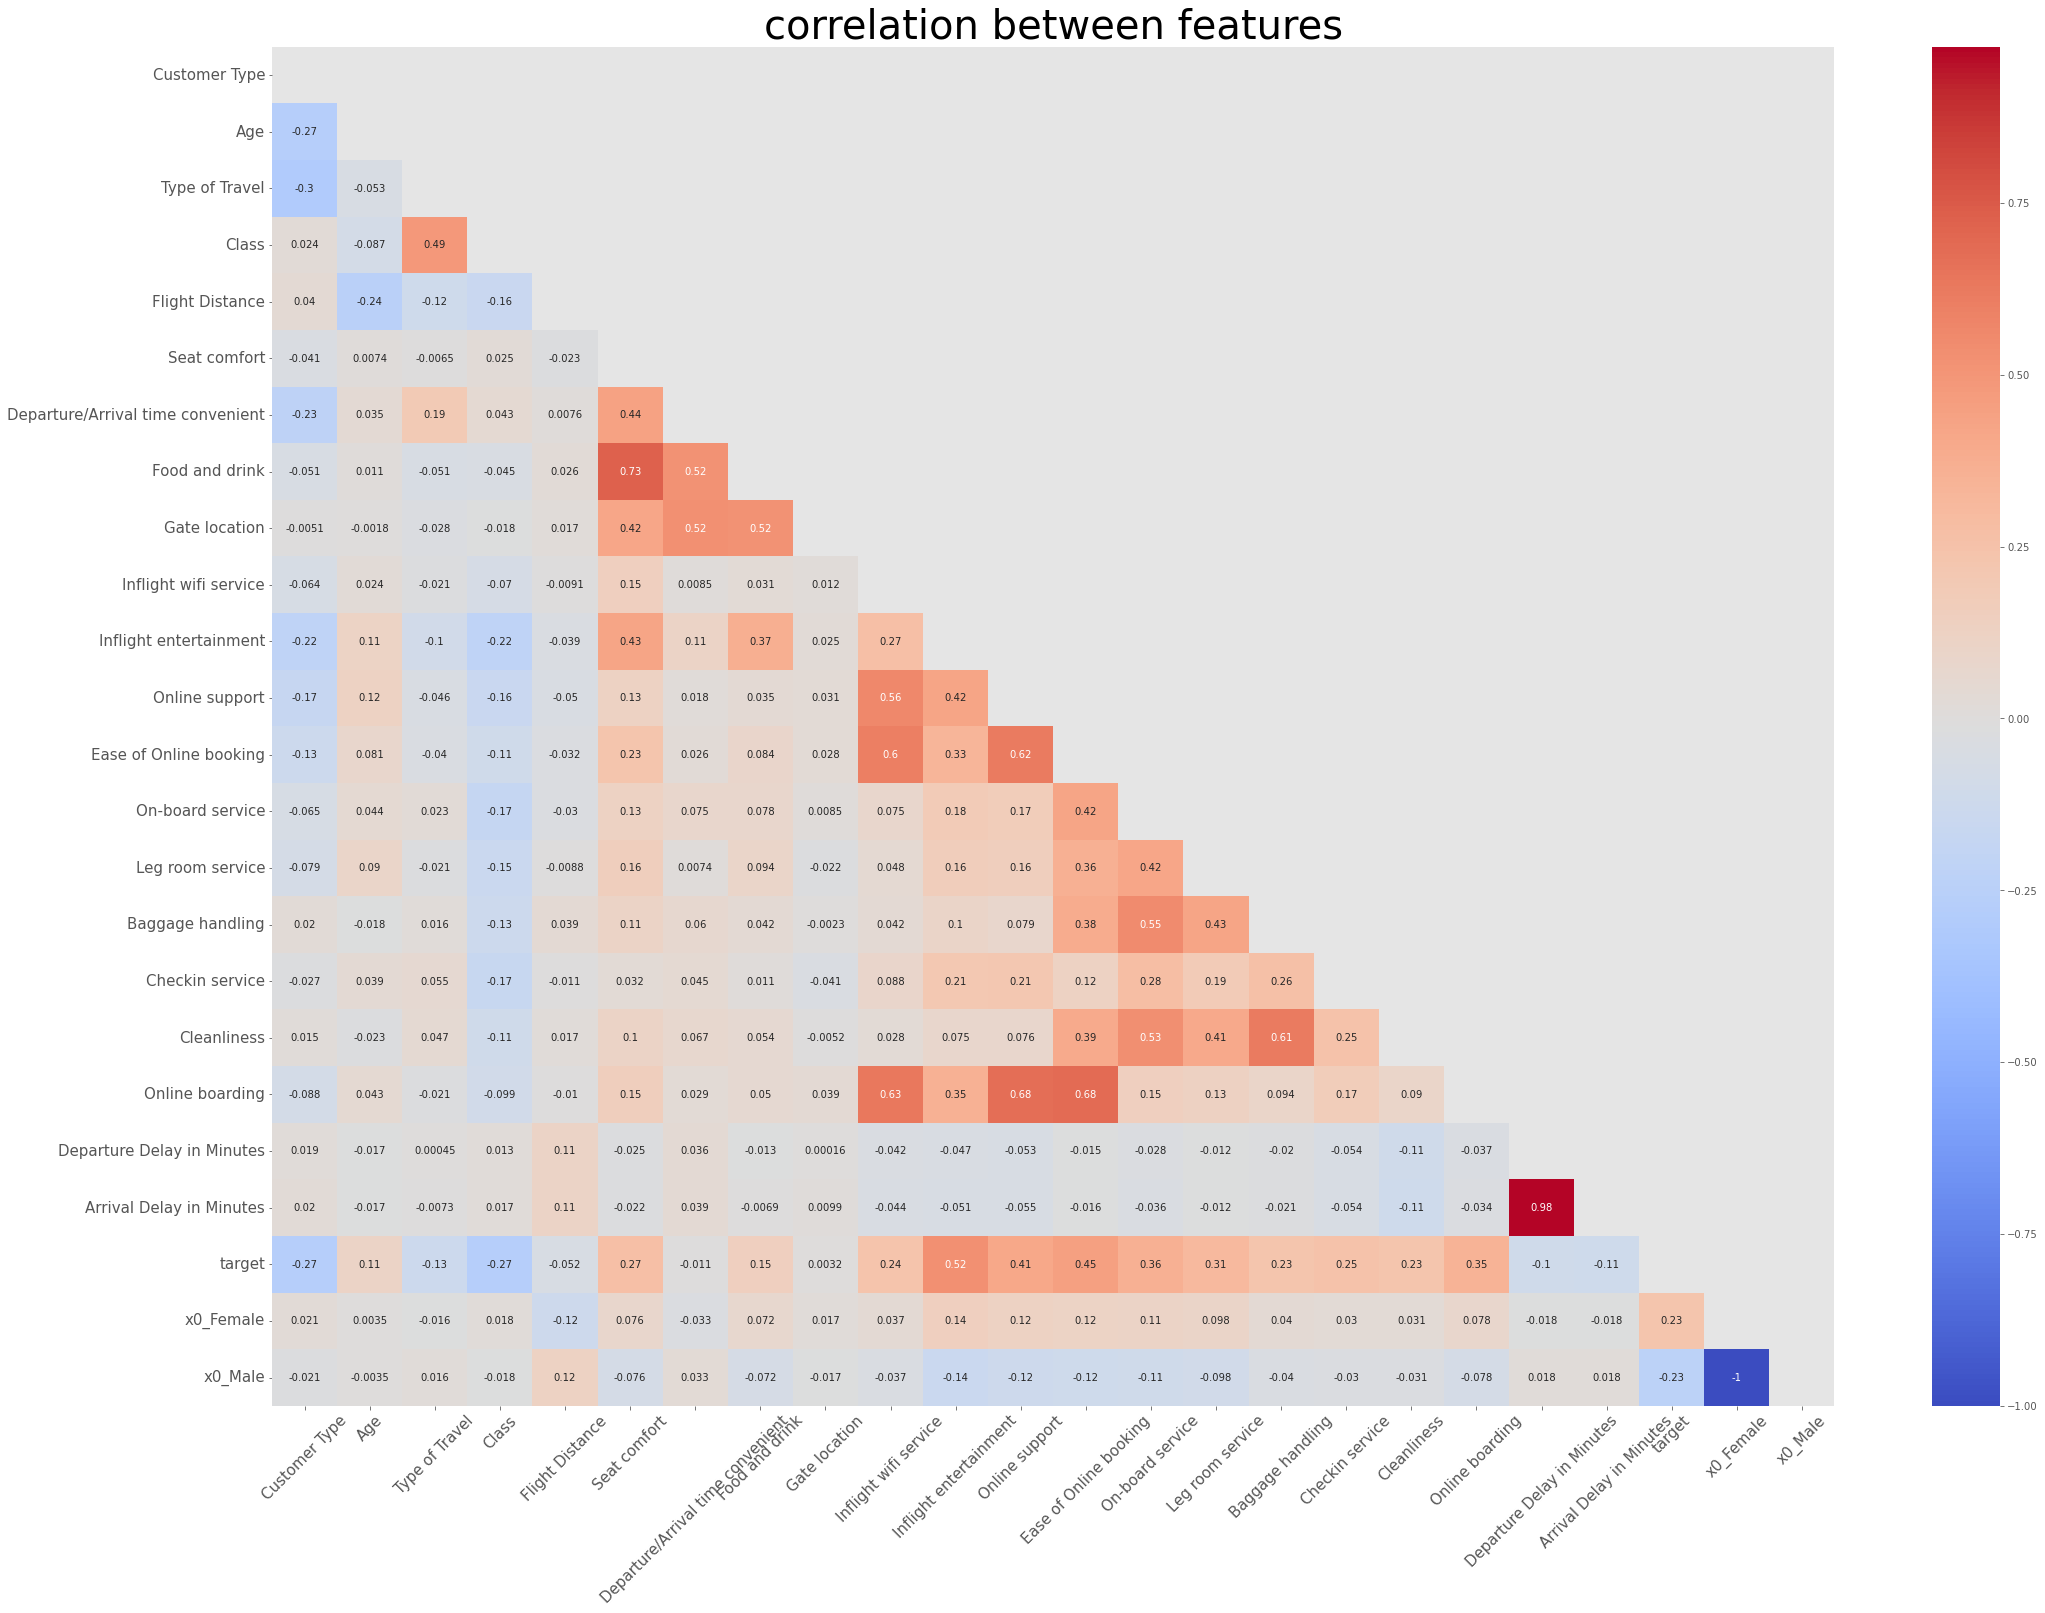

In [23]:
corr_df = train.copy()

plt.figure(figsize=(35,25))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)]= True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize =40)
plt.show()

상관계수의 절대값이 0에 가까운 feature들이 좋지 않은 변수.

현재는 target기준으로 gate location , departure/arrical time convenient food and drink , age 의 상관계수가 낮은것을 확인 할 수 있습니다.

반대로 inflight entertainment와 online support ease of online booking이 높은 상관계수를 보입니다.



## 다중 공선성 확인

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[]
for i in range(len(train.columns)):
    vif.append(variance_inflation_factor(train.values, i))
    
vif

[1.5594981143876332,
 1.2039018104928518,
 1.7245881949577588,
 1.5893150290590379,
 1.151848336671263,
 2.5894343419650325,
 1.854997789414278,
 2.765289553826162,
 1.6918329457372454,
 2.042613654783657,
 1.9612814524166164,
 2.399780315310934,
 3.7711615485321603,
 1.8429172774481057,
 1.4449352473232737,
 1.9727956035504157,
 1.2839275377647035,
 1.9861373169807914,
 2.707614074598557,
 22.10471723048456,
 22.168480707353652,
 1.9924046693482984,
 29.430750136783992,
 28.994706957447793]

In [25]:
vif = pd.DataFrame(vif)
vif.index = train.columns
vif

,0
Customer Type,1.559498
Age,1.203902
Type of Travel,1.724588
Class,1.589315
Flight Distance,1.151848
Seat comfort,2.589434
Departure/Arrival time convenient,1.854998
Food and drink,2.765290
Gate location,1.691833
Inflight wifi service,2.042614


출발 지연시각과 도착시간 시각이 vif >10을 넘는 것으로 봐서 다중공선성이 있다고 판단
arrival delay in minutes를 제거 하겠습니다.

In [26]:
train.drop('Arrival Delay in Minutes', axis=1, inplace= True)
test.drop('Arrival Delay in Minutes', axis=1, inplace = True)

In [27]:
# 다시 vif를 만들어 보자

vif2 = []
for i in range(len(train.columns)):
    vif2.append(variance_inflation_factor(train.values,i))
vif2 = pd.DataFrame(vif2)
vif2.index = train.columns
vif2

,0
Customer Type,1.558395
Age,1.203862
Type of Travel,1.719180
Class,1.587351
Flight Distance,1.151840
Seat comfort,2.589434
Departure/Arrival time convenient,1.854974
Food and drink,2.764986
Gate location,1.690345
Inflight wifi service,2.040897


## 랜덤 포레스트 

이상치를 제거하기전과 비교를 위해 또한 랜덤포레스트는 scaling에 큰 영향을 받지 않으므로 먼저 랜덤 포레스트로 fitting을 해보겠습니다.

In [28]:
train.rf = train.drop('target', axis=1)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train.rf, train['target'])



C:\Users\s\AppData\Local\Temp/ipykernel_9268/423729900.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.rf = train.drop('target', axis=1)


RandomForestClassifier()

In [29]:
prediction = rf.predict(test)

In [30]:
submission = pd.read_csv('airline_dataset/sample_submission.csv')

In [31]:
submission['target'] = prediction
submission.to_csv('airline_dataset/submission_rf.csv', index=False)

## 이상치 제거

이상치 확인을 위해 boxplot을 이용하여 이상치들을 확인해보자

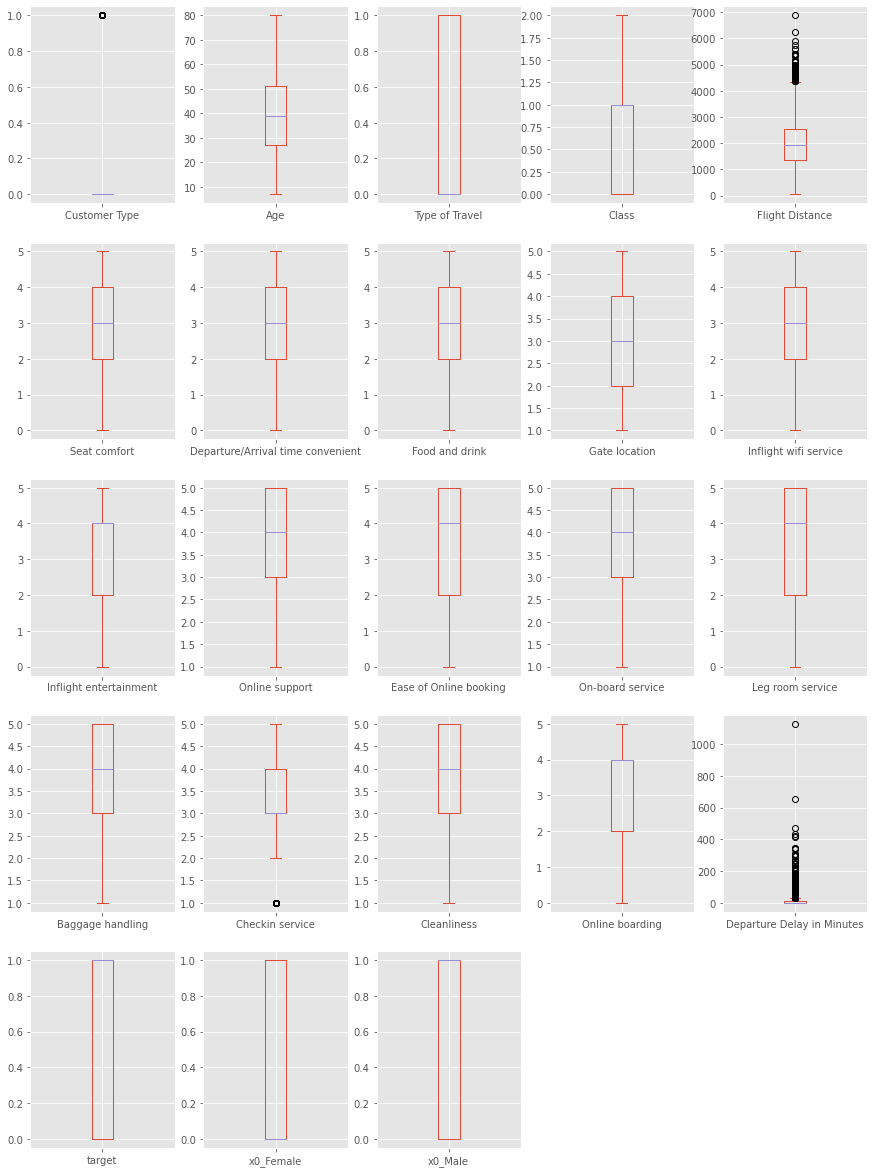

In [32]:
train.plot(kind='box', subplots=True, layout=(5,5), figsize=(15,21))
plt.show()

In [33]:
def outliers_iqr(train):
    q1, q3= np.percentile(train, [25,75]) # 넘파이의 값을 퍼센트로 표시
    
    iqr = q3 - q1
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)
    
    return np.where((train> upper_bound) | (train < lower_bound))

In [34]:
departuredelay_index_train = outliers_iqr(train['Departure Delay in Minutes'])[0]
flightdistance_index_train = outliers_iqr(train['Flight Distance'])[0]
checkin_index_train = outliers_iqr(train['Checkin service'])[0]

In [35]:
departuredelay_index_train.shape

(428,)

428개의 많은 이상치 보유. -> 제거 말고 평균값으로 대체

In [36]:
train.loc[departuredelay_index_train,'Departure Delay in Minutes']=train['Departure Delay in Minutes'].mean()
train.loc[flightdistance_index_train,'Flight Distance']=train['Flight Distance'].mean()
train.loc[checkin_index_train,'Checkin service']=train['Checkin service'].mean()

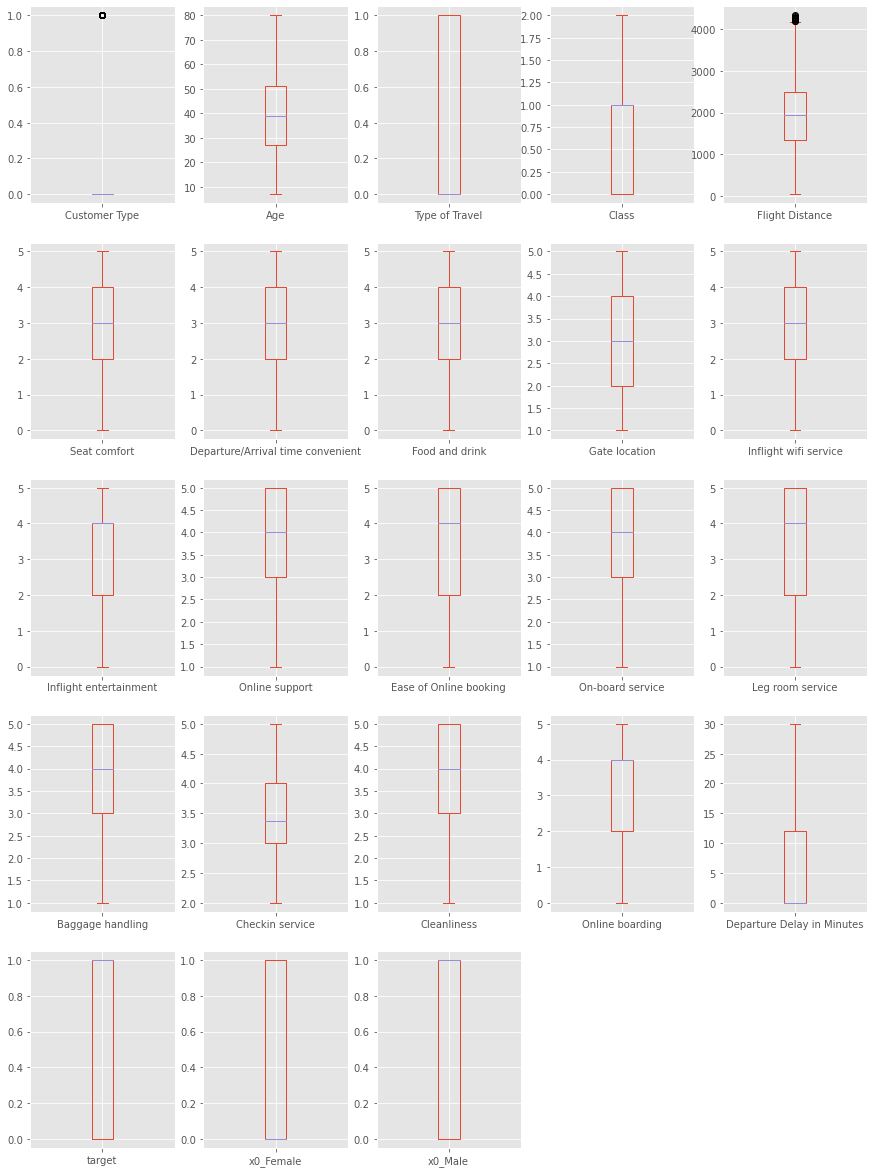

In [37]:
train.plot(kind='box', subplots=True, layout=(5,5), figsize=(15,21))
plt.show()

다시 랜덤포레스트 모델 적용!

In [38]:
train.rf = train.drop('target', axis=1)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train.rf, train['target'])

RandomForestClassifier()

In [39]:
prediction = rf.predict(test)

In [40]:
submission = pd.read_csv('airline_dataset/sample_submission.csv')

In [41]:
submission['target'] = prediction
submission.to_csv('airline_dataset/submission_rf2.csv', index=False)

## 데이터 스케일링

이상치를 제거 했으니 데이터 스케일링을 해보겠습니다.

In [43]:
x_train = train.drop('target', axis=1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [44]:
train_scaled = scaler.transform(x_train)

In [45]:
test_scaled = scaler.transform(test)

## 모델 학습

In [51]:
# 여러 모델 비교
!pip install catboost


  Using cached catboost-1.0.4-cp39-none-win_amd64.whl (73.5 MB)
  Using cached plotly-5.6.0-py2.py3-none-any.whl (27.7 MB)


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [53]:
cat = CatBoostClassifier(silent=True)
cat.fit(train_scaled, train['target'])

In [55]:
prediction = cat.predict(test_scaled)

### 최종 예측 결과 제출파일 생성

In [56]:
submission = pd.read_csv('airline_dataset/sample_submission.csv')
submission['target'] = prediction
submission.to_csv('airline_dataset/submission_catboost.csv', index=False)